In [ ]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('Placement.csv')
df.drop("sl_no", axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# remove null values from salary column
df = df.fillna(df['salary'].isna())
df = df.fillna(df['salary'].mean())
df.isna().sum()

## Option 1 to find Multi-Collinearity using 
# Eigenvalues of Correlation Matrix


In [4]:
import numpy as np

corr_matrix = df.select_dtypes(include=[np.number]).corr()
eigenvalues = np.linalg.eigvals(corr_matrix)

print("Eigenvalues:", eigenvalues)
# Very small eigenvalues (near 0) indicate multicollinearity

Eigenvalues: [2.48859125 1.08122727 0.44030857 0.54786321 0.64388978 0.79811993]


## Option 2 to find Multi-Collinearity using  -- Tolerance (Inverse of VIF)

#### Tolerance < 0.1 indicates multicollinearity (equivalent to VIF > 10)

In [27]:
def calculate_tolerance(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
     # Select only numeric features (exclude target variable)
    X = df.select_dtypes(include=[np.number])

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
    return vif_data.sort_values('VIF', ascending=False)
calculate_tolerance(df[["hsc_p","etest_p"]])

,Feature,VIF
0,hsc_p,22.729473
1,etest_p,22.729473


## Enhanced Correlation Check

In [41]:
# Find pairs with high correlation
threshold = 0.8
high_corr_pairs = []
corr_matrix = df.select_dtypes(include=[np.number]).corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("High correlation pairs found:")
    print(pd.DataFrame(high_corr_pairs))
else:
    print("No high correlations found")
print(corr_matrix.iloc[0, 1])
corr_matrix

No high correlations found
0.5114721015997729


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


## Option 3: Correlation Matrix

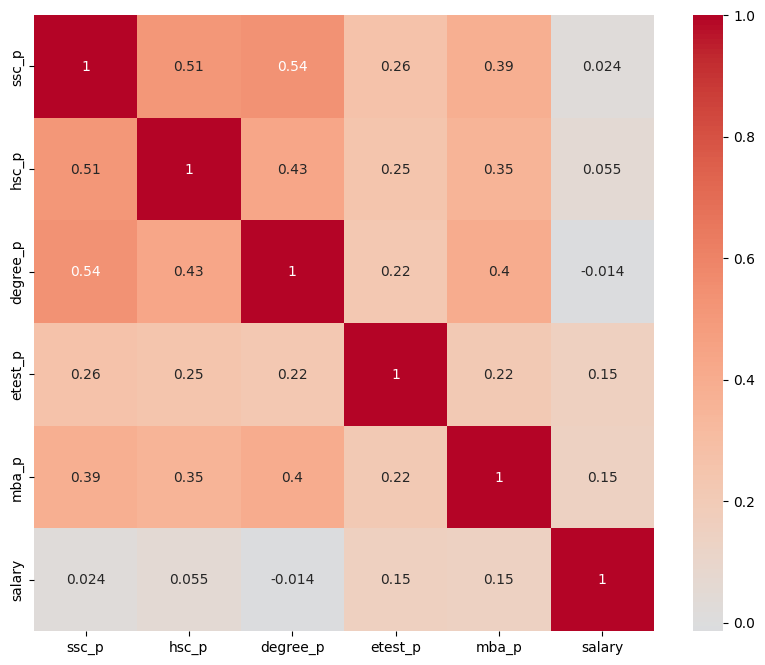

In [22]:
# Pearson correlation (linear relationships)
corr_matrix = df.select_dtypes(include=[np.number]).corr()


# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


## note : VIF is the more reliable method because it accounts for all predictors simultaneously.